# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [132]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [133]:
#Cargamos dataset a utilizar
df_car = pd.read_csv('../data/car_evaluation.csv')

## Análisis exploratorio de datos

In [134]:
#Visualizacion del dataframe
df_car.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [135]:
#Analizamos el shape del objeto
print(df_car.shape)

(1727, 7)


In [136]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_name = ['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class']
df_car.columns = col_name

In [137]:
#Vericamos la transformacion
df_car.head(10)

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [138]:
#Visualizamos los tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
person      object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [139]:
# Exploremos un poco mas la variable target
df_car['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [140]:
#Verificamos valores missings
df_car.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [141]:
#Separamos en X e y
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [142]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [143]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [144]:
y_train.shape, y_test.shape

((1208,), (519,))

In [145]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buying,maint,doors,person,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low


In [146]:
X_train.dtypes

buying      object
maint       object
doors       object
person      object
lug_boot    object
safety      object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [147]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce # pip install category-encoders

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [148]:
#Verificamos la transformacion
X_train.head()

,buying,maint,doors,person,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [149]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [150]:
#Entrenamiento
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [151]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [152]:
y_train_pred_tree

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'],
      shape=(1208,), dtype=object)

## Evaluación de modelo de clasificación con árbol de decisión

In [153]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es: ', train_accuracy_tree)
print('El accuracy en test es: ', test_accuracy_tree)

El accuracy en train es:  0.7673841059602649
El accuracy en test es:  0.8015414258188824


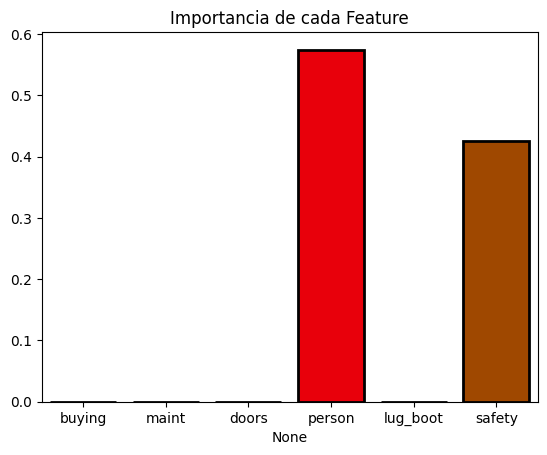

In [154]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, hue=columns, palette='bright', legend=False, saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

## Entrenamiento de modelo de clasificación con random forest

In [155]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [162]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [163]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("El acuracy en train es: ",train_accuracy_rf)
print("El acuracy en test es: ",test_accuracy_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

El acuracy en train es:  0.9975165562913907
El acuracy en test es:  0.9113680154142582


In [164]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_scores

safety      0.287028
person      0.220375
buying      0.201322
maint       0.110309
lug_boot    0.105831
doors       0.075135
dtype: float64

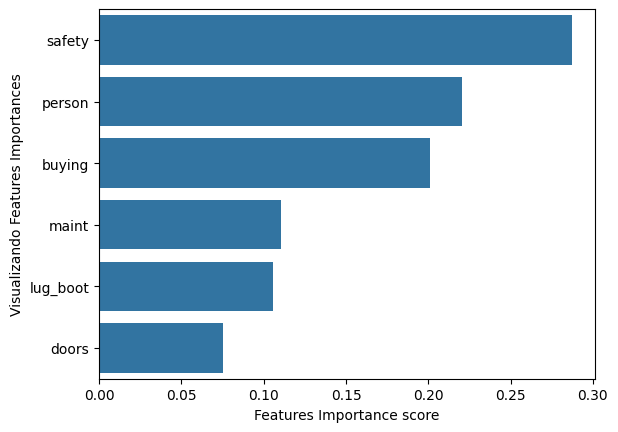

In [165]:
#Grafico de barras
import seaborn as sns

sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel("Features Importance score")
plt.ylabel("Visualizando Features Importances")
plt.show()


In [168]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,  y_test_pred_rf)

print("Matriz de Confusion\n ", cm)

Matriz de Confusion
  [[106   2   9   1]
 [  8   5   2   2]
 [ 14   0 347   0]
 [  4   4   0  15]]


In [169]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,  y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.80      0.90      0.85       118
        good       0.45      0.29      0.36        17
       unacc       0.97      0.96      0.97       361
       vgood       0.83      0.65      0.73        23

    accuracy                           0.91       519
   macro avg       0.77      0.70      0.73       519
weighted avg       0.91      0.91      0.91       519

